
Ingrese los valores de x separados por comas (ejemplo: 1, 2, 3):
10, 12, 20

Ingrese los valores de y separados por comas (ejemplo: 2, 4, 6):
33, 69, 420

Ingrese las derivadas de y separadas por comas (ejemplo: 0, 1, -1):
1, 2, 2

El polinomio de interpolación de Hermite es:
                5               4                 3              2                         
- 0.1220546875⋅x  + 8.76884375⋅x  - 246.14884375⋅x  + 3377.4175⋅x  - 22675.3375⋅x + 59710.5


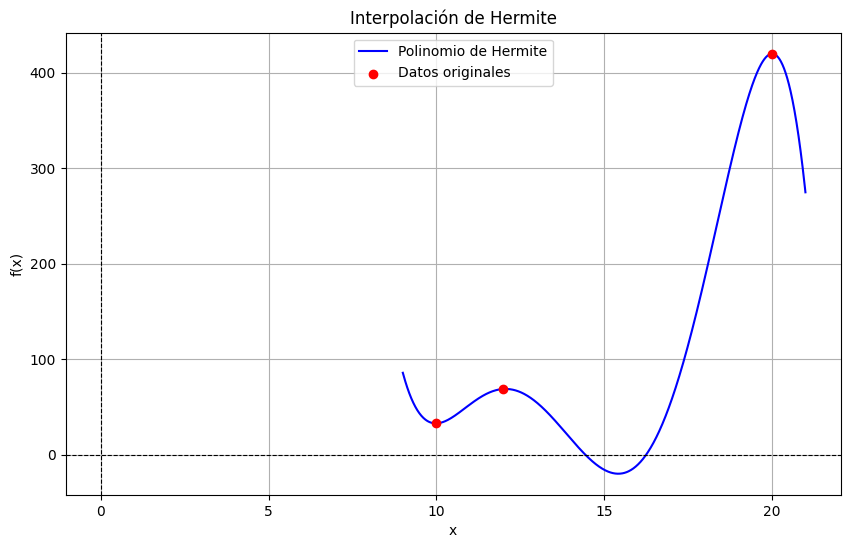

In [1]:
# Código creado por Joshua Mijangos López, 29/12/24
# Este código se debe ejecutar en Google Colab debido al cuadro de diálogo

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Funciones auxiliares

def interpolacion_hermite(valores_x, valores_y, derivadas_y):
    n = len(valores_x)
    x = sp.Symbol('x')
    H = 0

    for i in range(n):
        # Producto para L_i(x)
        Li = 1
        for j in range(n):
            if i != j:
                Li *= (x - valores_x[j]) / (valores_x[i] - valores_x[j])
        Li = sp.simplify(Li)

        # Término principal con L_i(x)^2
        H += valores_y[i] * (1 - 2 * sp.diff(Li, x).subs(x, valores_x[i]) * (x - valores_x[i])) * (Li ** 2)

        # Término adicional con la derivada
        H += derivadas_y[i] * (x - valores_x[i]) * (Li ** 2)

    return sp.simplify(H)

def graficar_interpolacion(valores_x, valores_y, polinomio, rango_x=(-10, 10), num_puntos=1000):
    x_numerico = np.linspace(rango_x[0], rango_x[1], num_puntos)
    f_lambdificada = sp.lambdify(sp.Symbol('x'), polinomio)
    y_numerico = f_lambdificada(x_numerico)

    # Gráfica
    plt.figure(figsize=(10, 6))
    plt.plot(x_numerico, y_numerico, label='Polinomio de Hermite', color='blue')
    plt.scatter(valores_x, valores_y, color='red', label='Datos originales', zorder=5)
    plt.title('Interpolación de Hermite')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
    plt.legend()
    plt.grid()
    plt.show()

# Ejemplo de uso
def principal():
    # Solicitar datos al usuario
    print("\nIngrese los valores de x separados por comas (ejemplo: 1, 2, 3):")
    valores_x = list(map(float, input().split(',')))
    print("\nIngrese los valores de y separados por comas (ejemplo: 2, 4, 6):")
    valores_y = list(map(float, input().split(',')))
    print("\nIngrese las derivadas de y separadas por comas (ejemplo: 0, 1, -1):")
    derivadas_y = list(map(float, input().split(',')))

    if len(valores_x) != len(valores_y) or len(valores_x) != len(derivadas_y):
        print("Error: El número de valores de x, y y derivadas debe ser igual.")
        return

    # Calcular el polinomio de interpolación
    polinomio = interpolacion_hermite(valores_x, valores_y, derivadas_y)
    print("\nEl polinomio de interpolación de Hermite es:")
    sp.pprint(polinomio)

    # Graficar el polinomio junto con los datos originales
    x_min, x_max = min(valores_x) - 1, max(valores_x) + 1
    graficar_interpolacion(valores_x, valores_y, polinomio, rango_x=(x_min, x_max))

# Ejecutar el código principal
if __name__ == "__main__":
    principal()
